# **Execution demonstration of the RAG architecture**

In [ ]:
!pip install langchain faiss-cpu sentence-transformers openai pdfplumber plotly transformers
!pip install -U langchain-community
!pip install httpx==0.27.7
from google.colab import drive
drive.mount('/content/drive')
import os
os.environ['OPENAI_API_KEY'] = 'your_openai_api_key'
from langchain.text_splitter import RecursiveCharacterTextSplitter

def chunk_document(text, chunk_size=800, chunk_overlap=100):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        separators=["\n\n", "\n", ".", " "]
    )
    return text_splitter.split_text(text)
!pip install --upgrade langchain faiss-cpu

from langchain.embeddings import OpenAIEmbeddings

def create_online_embeddings(chunks):
    embeddings = OpenAIEmbeddings(openai_api_key=os.getenv('OPENAI_API_KEY'))
    return embeddings.embed_documents(chunks)

from sentence_transformers import SentenceTransformer

def create_offline_embeddings(chunks):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    return [model.encode(chunk) for chunk in chunks]

from langchain.vectorstores import FAISS

def create_vector_store(embeddings, chunks):
  if isinstance( embdeddings, list):# Corrected typo: embeddings instead of embeddings
     #Check if embeddings is a list (offline mode)
     # In Offline mode, 'embeddings' is already a list of embeddings.
     vector_store= FAISS.from_embeddings(text_embeddings=zip(chunks, embeddings), embeddings= None)
  else: # Online mode ( embeddings is an OpenAIEmebddings object)
      #Online mode: First, compute embdeddings from text chunks
      embeddings_list= embeddings.embed_document(chunks) # call embed_document here
      vector_store=FAISS.from_embeddings(text_embeddings=zip(chunks, embeddings_list), embedding=None)
       # Pass embeddings to FAISS
  return vector_store









from langchain.llms import OpenAI
from langchain.chains import RetrievalQA

def online_response_pipeline(question, vector_store):
    retriever = vector_store.as_retriever()
    llm = OpenAI(model='gpt-4', openai_api_key=os.getenv('OPENAI_API_KEY'))
    qa_chain = RetrievalQA(llm=llm, retriever=retriever)
    return qa_chain.run(question)

from transformers import pipeline

def offline_response_pipeline(question, vector_store):
    retriever = vector_store.as_retriever()
    context_chunks = retriever.retrieve(question, top_k=5)
    context = "\n".join(context_chunks)

    qa_pipeline = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")
    answer = qa_pipeline({"context": context, "question": question})
    return answer['answer']

import pdfplumber

def parse_pdf(file_path):
    with pdfplumber.open(file_path) as pdf:
        text = "\n".join(page.extract_text() for page in pdf.pages)
    return text

from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    text = parse_pdf(file_name)

import plotly.express as px

def visualize_data(data):
    fig = px.bar(data, x='Year', y='Solvency Ratio', title='Solvency Ratios Over Time')
    fig.show()

import IPython.display as display

def chatbot_interface():
    document = input("Paste the SFCR document text: ")
    question = input("Enter your question: ")
    chunks = chunk_document(document)

    use_offline = input("Use offline mode? (yes/no): ").strip().lower() == 'yes'

    if use_offline:
        embeddings = create_offline_embeddings(chunks)
        vector_store = create_vector_store(embeddings, chunks)
        answer = offline_response_pipeline(question, vector_store)
    else:
        embeddings = create_online_embeddings(chunks)
        vector_store = create_vector_store(embeddings, chunks)
        answer = online_response_pipeline(question, vector_store)

    print(f"Answer: {answer}")

chatbot_interface()


at first the requirements needs to be satisfied:
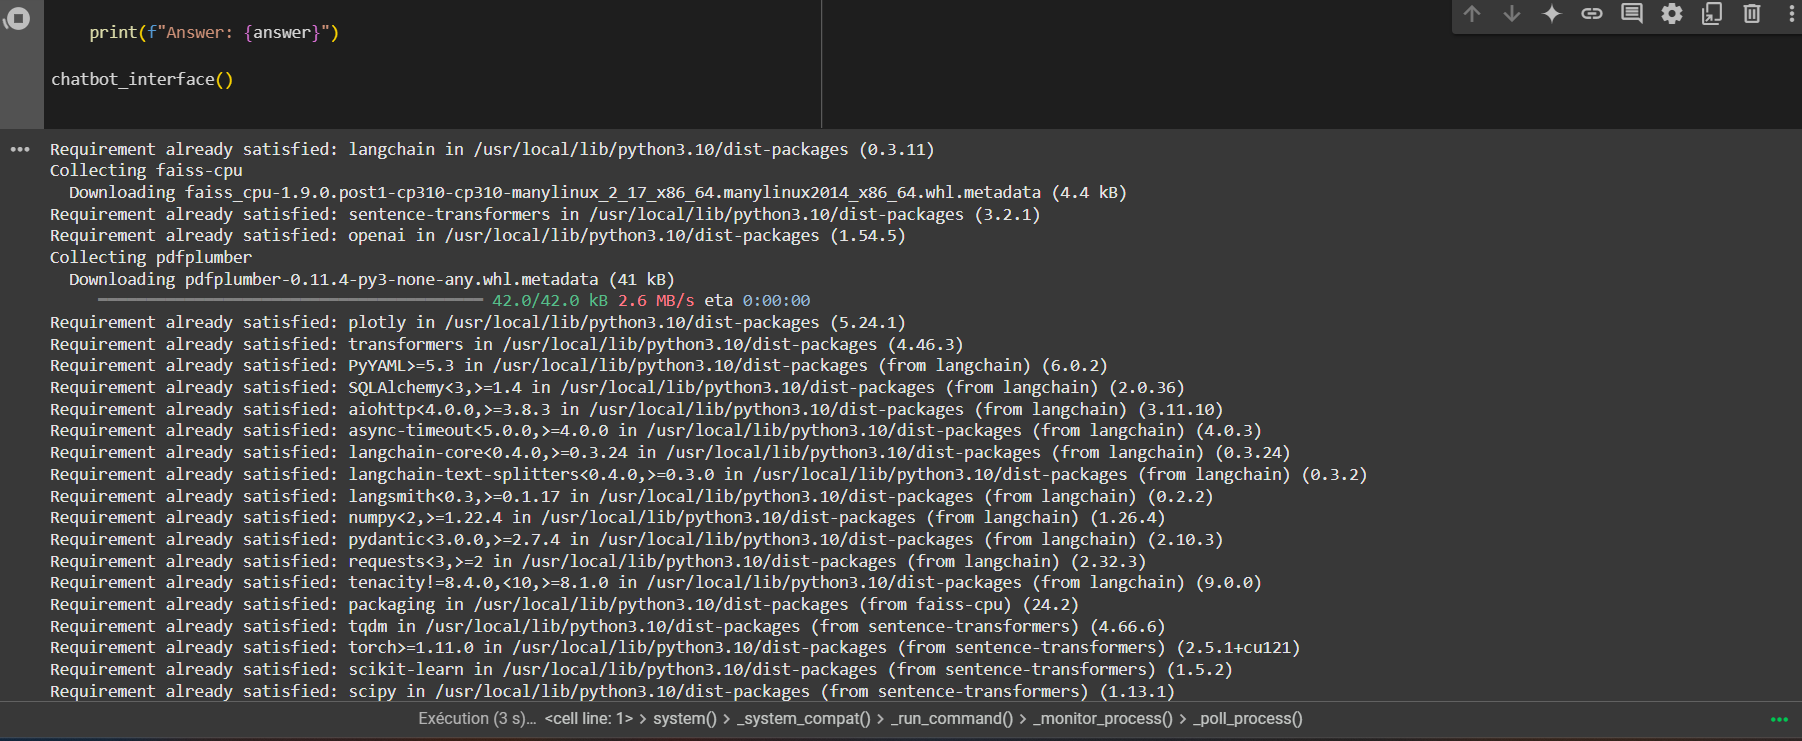


then comes the selection of files:

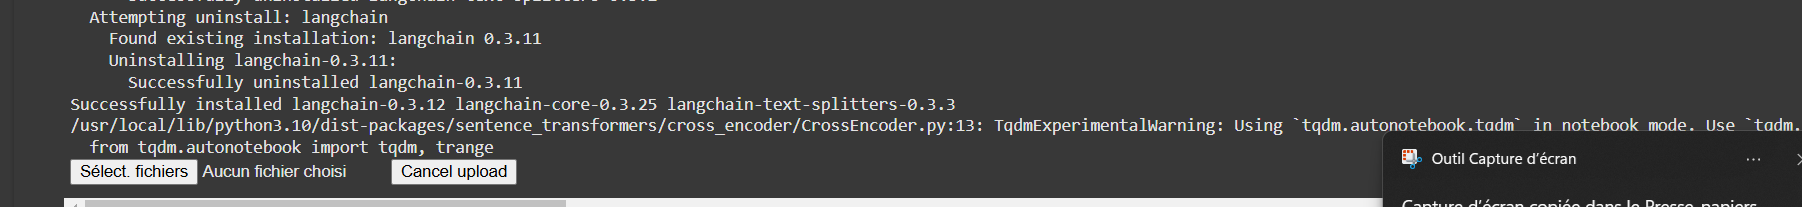

after uploading them comes the next step:

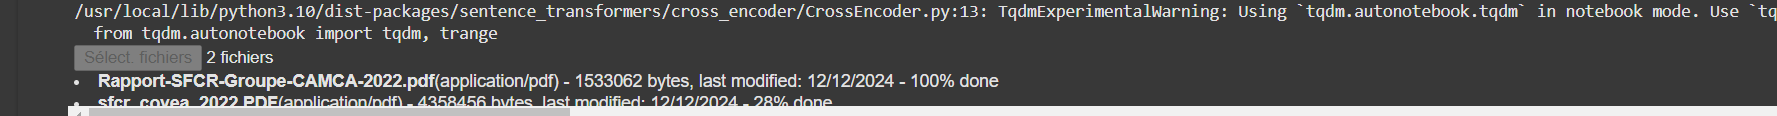

write down the path to your file and then give a question about the file then decide whether you want to use offline mode or not:


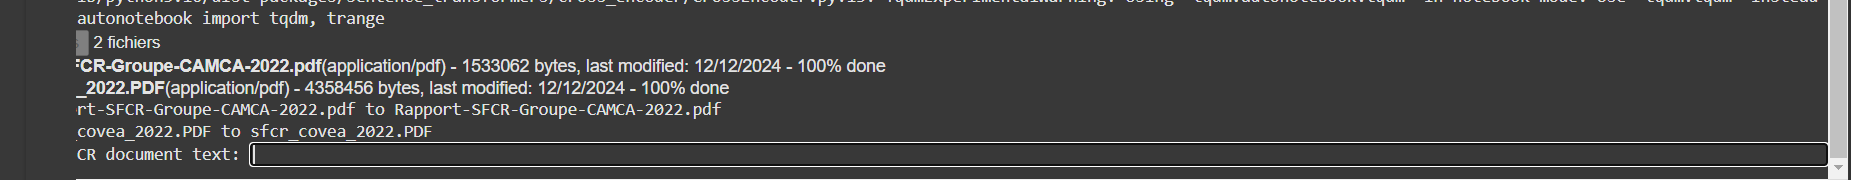

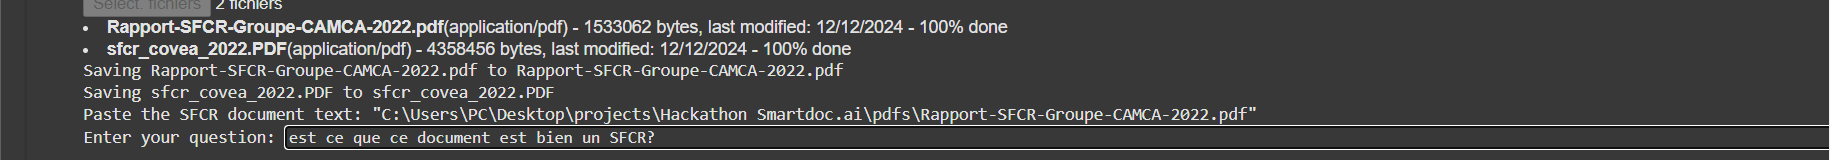




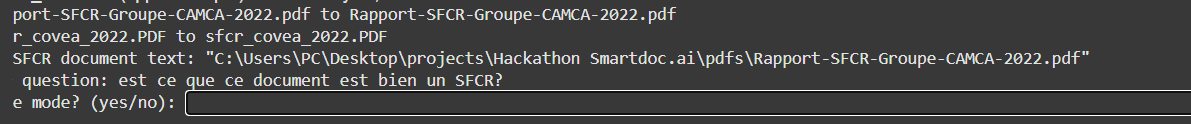

And finally the execution:

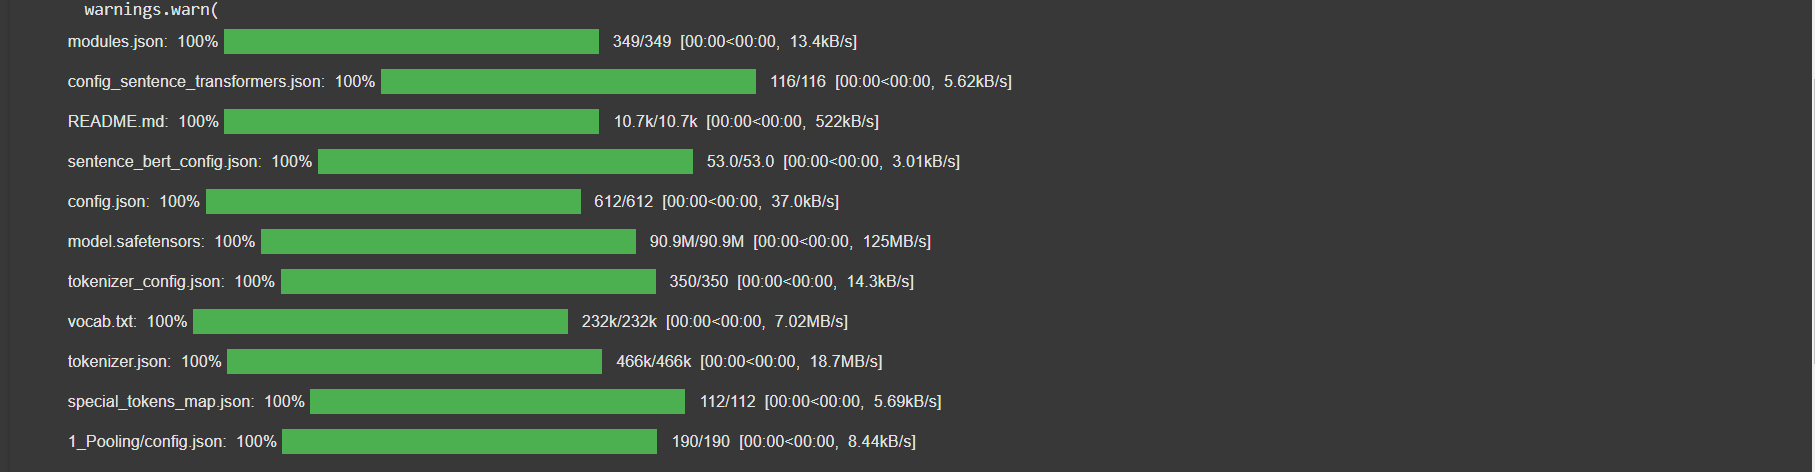